In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cleaned_salary_data.csv')

In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Age,Type of ownership,Industry,Sector,Revenue,Competitors,Is_Headquarter,Python,Spark,Aws,Excel
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501.0,50,Company - Private,Aerospace & Defense,Aerospace & Defense,75.0,0,False,1,0,0,1
1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000.0,39,Other Organization,Health Care Services & Hospitals,Health Care,3.5,0,False,1,0,0,0
2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501.0,13,Company - Private,Security Services,Business Services,300.0,0,True,1,1,0,1
3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001.0,58,Government,Energy,"Oil, Gas, Energy & Utilities",250.5,3,True,1,0,0,0
4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51.0,25,Company - Private,Advertising & Marketing,Business Services,NaN,3,True,1,0,0,1


<Axes: >

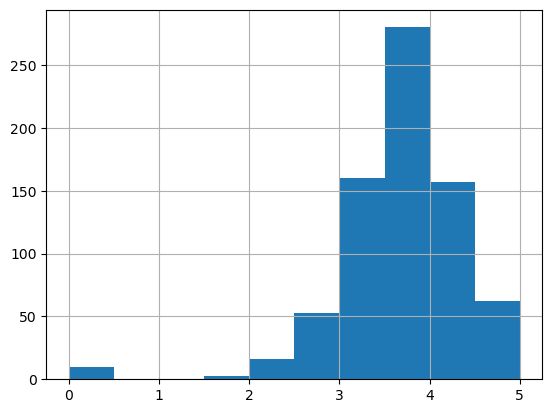

In [6]:
df.Rating.hist()

In [9]:
df.rename(columns={'Salary Estimate':'SalaryEstimate'},inplace=True)

<Axes: >

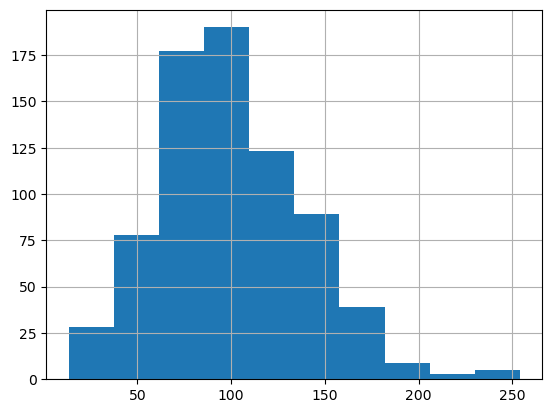

In [10]:
df.SalaryEstimate.hist()

<Axes: >

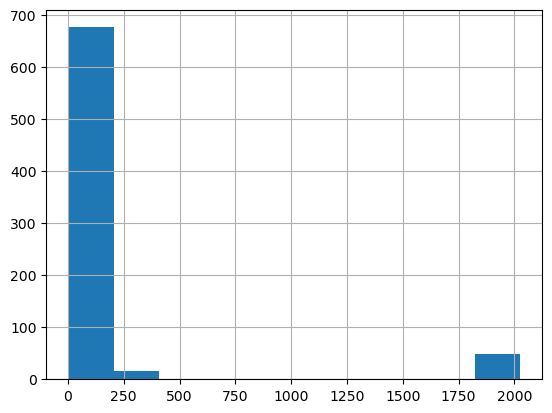

In [12]:
df.Age.hist()

<Axes: >

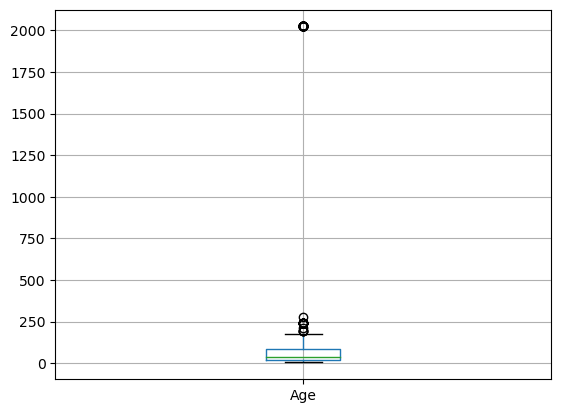

In [16]:
df.boxplot(column=['Age'])

<Axes: >

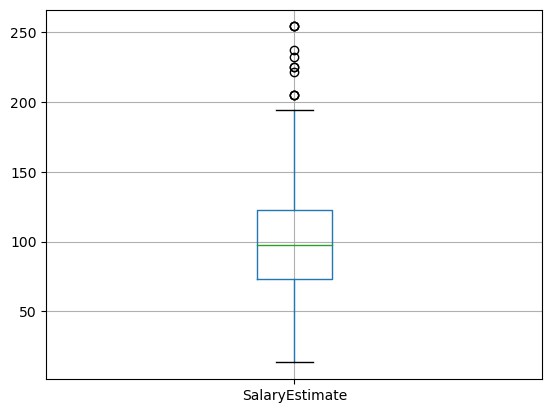

In [18]:
df.boxplot(column=['SalaryEstimate'])

<Axes: >

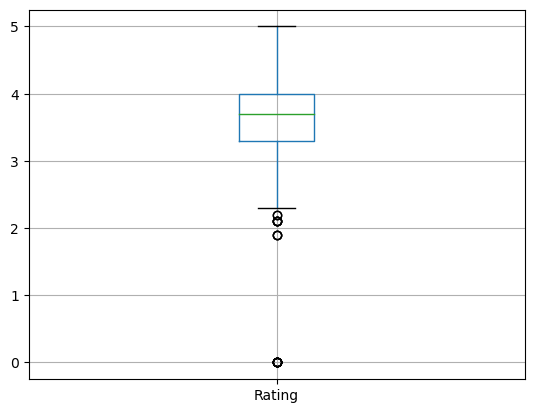

In [19]:
df.boxplot(column=['Rating'])

<Axes: >

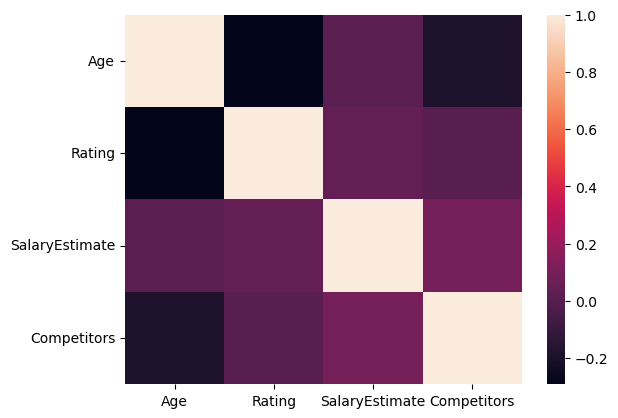

In [23]:
sns.heatmap(df[['Age','Rating','SalaryEstimate','Competitors']].corr())

In [24]:
df.columns

Index(['Job Title', 'SalaryEstimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Age',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Is_Headquarter', 'Python', 'Spark', 'Aws', 'Excel'],
      dtype='object')

In [43]:
df_cat_small = df[[ 'Size','Type of ownership', 'Sector', 'Revenue', 'Competitors','Is_Headquarter', 'Python', 'Spark', 'Aws', 'Excel']]

In [44]:
df_cat_large = df[['Job Title','Company Name', 'Location', 'Headquarters','Age','Industry']]

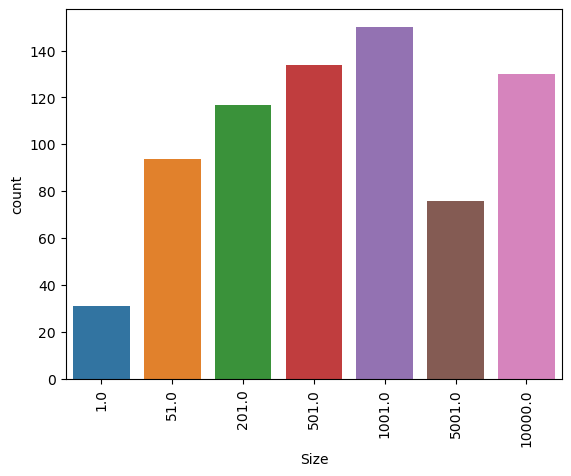

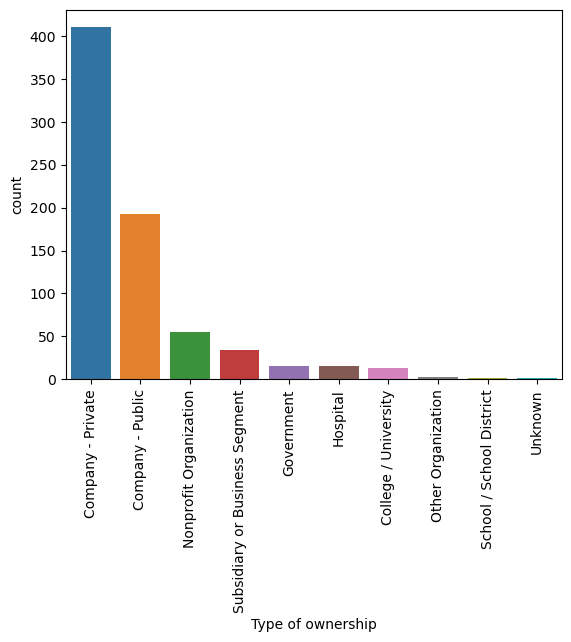

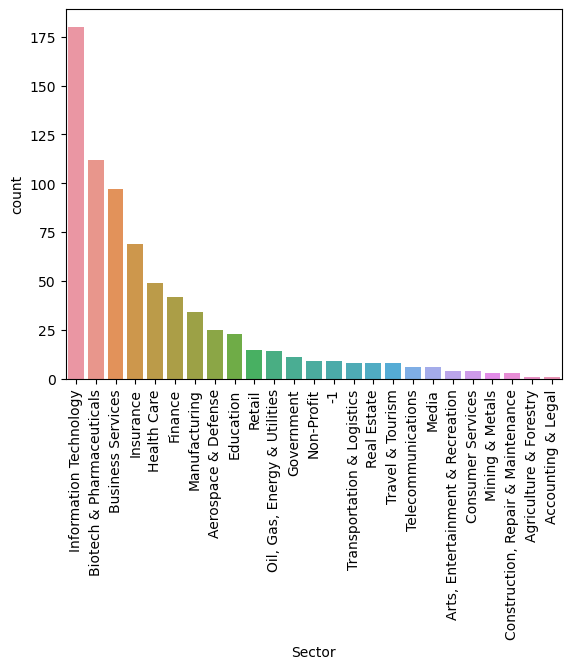

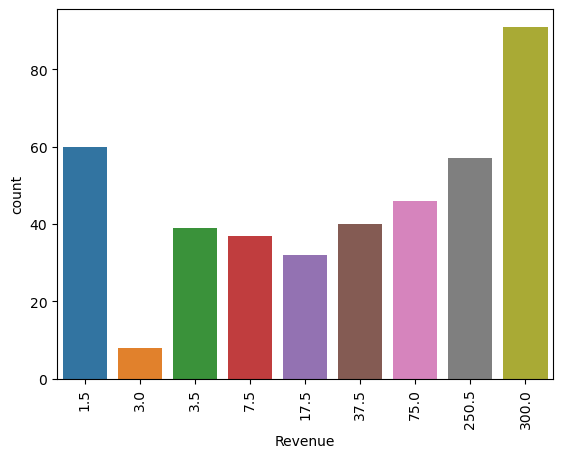

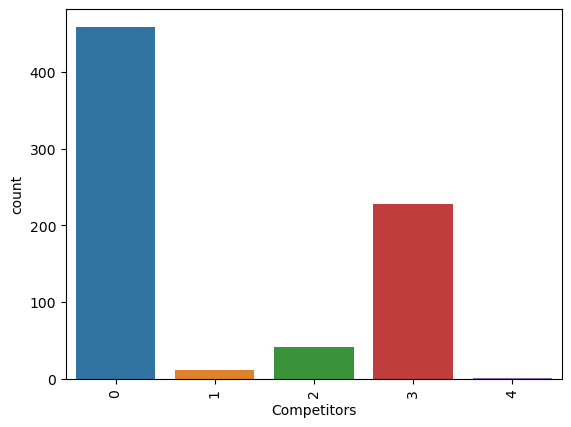

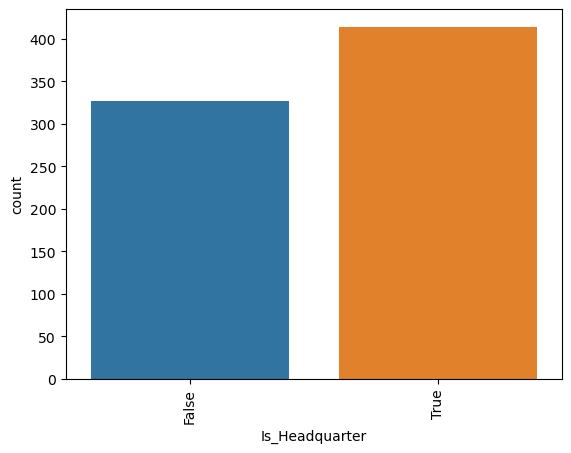

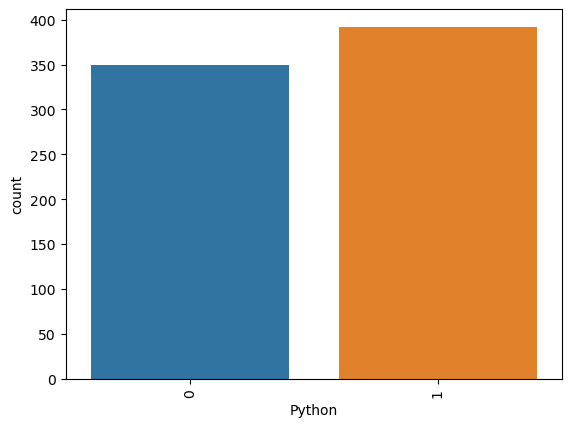

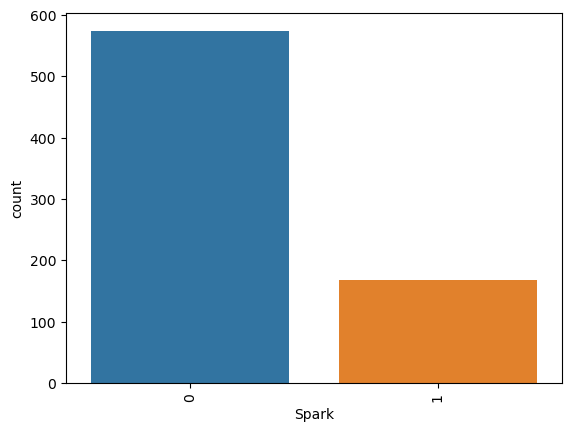

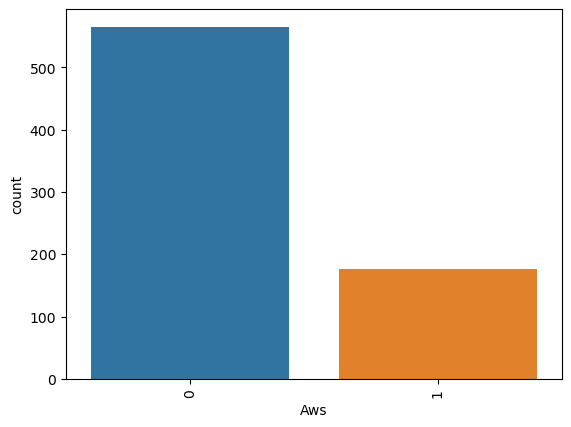

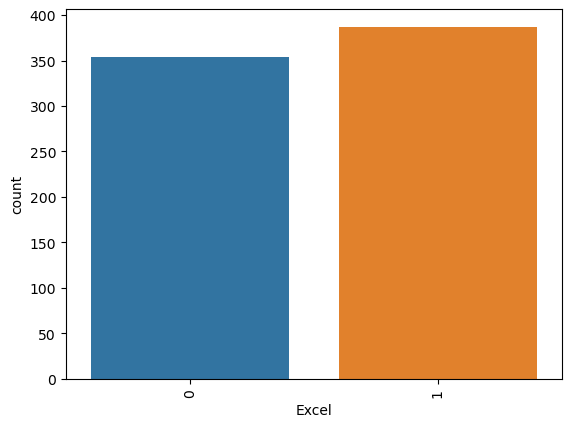

In [46]:
for i in df_cat_small:
    cat_num = df_cat_small[i].value_counts()
    sns.barplot(x=cat_num.index,y=cat_num)
    plt.xticks(rotation=90)
    plt.show()

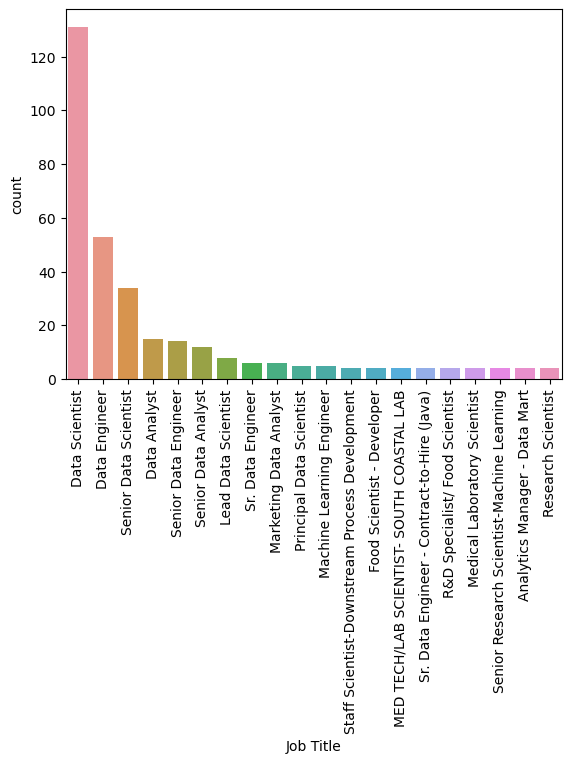

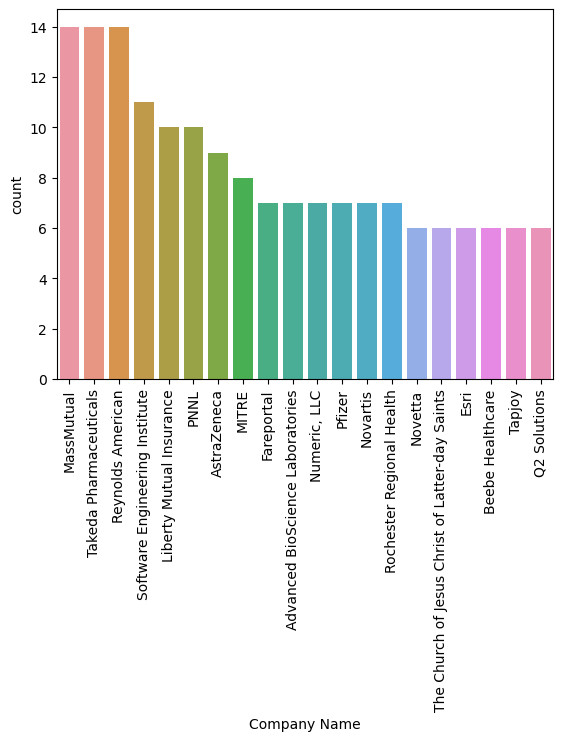

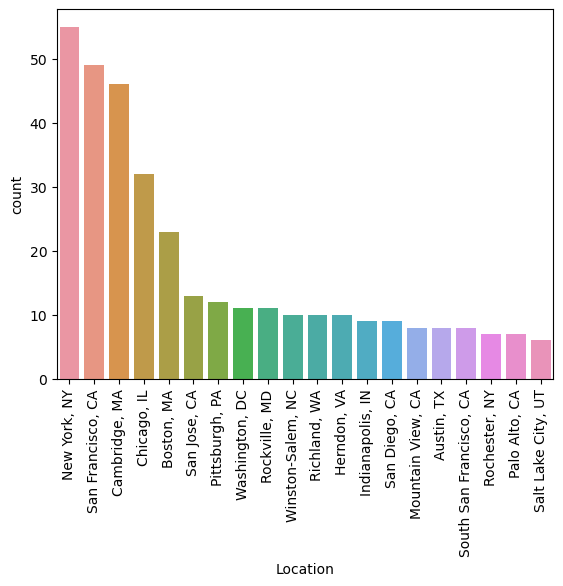

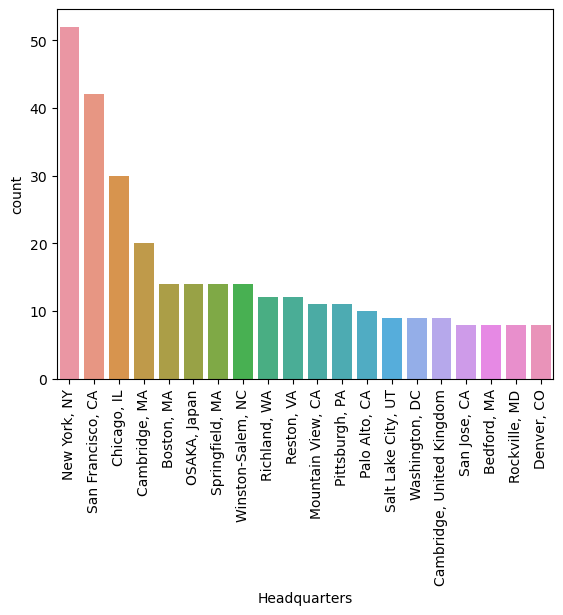

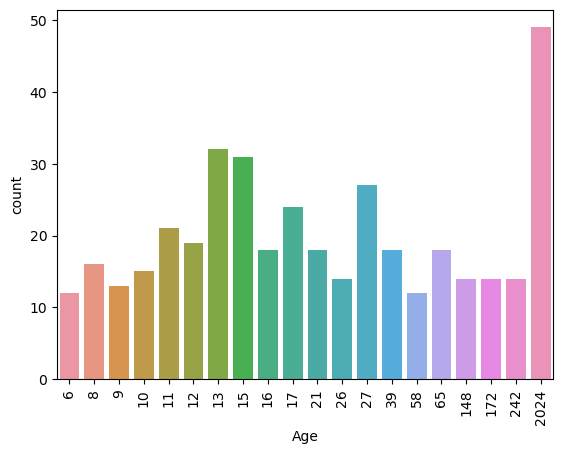

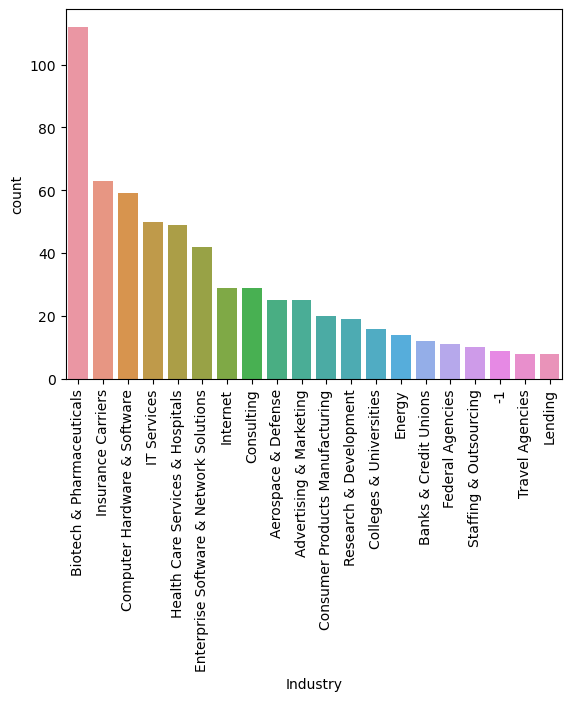

In [47]:
for i in df_cat_large:
    cat_num = df_cat_large[i].value_counts()[:20]
    sns.barplot(x=cat_num.index,y=cat_num)
    plt.xticks(rotation=90)
    plt.show()

In [48]:
pd.pivot_table(df,index='Job Title',values='SalaryEstimate')

,SalaryEstimate
Job Title,
Ag Data Scientist,80.5
Analytics - Business Assurance Data Analyst,43.0
Analytics Consultant,66.5
Analytics Manager,87.5
Analytics Manager - Data Mart,64.0
...,...
System and Data Analyst,59.0
Systems Engineer II - Data Analyst,62.5
"Technology-Minded, Data Professional Opportunities",70.5


In [51]:
pd.pivot_table(df,index=['Location','Is_Headquarter'],values='SalaryEstimate').sort_values('SalaryEstimate',ascending=False)

,,SalaryEstimate
Location,Is_Headquarter,
"Bellevue, WA",False,184.5000
"Lake Forest, IL",True,179.5000
"Mountain View, CA",True,177.1875
"Novato, CA",False,168.0000
"San Jose, CA",True,166.7500
...,...,...
"Omaha, NE",False,25.0000
"Burleson, TX",False,21.5000
"West Reading, PA",False,20.5000


In [52]:
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

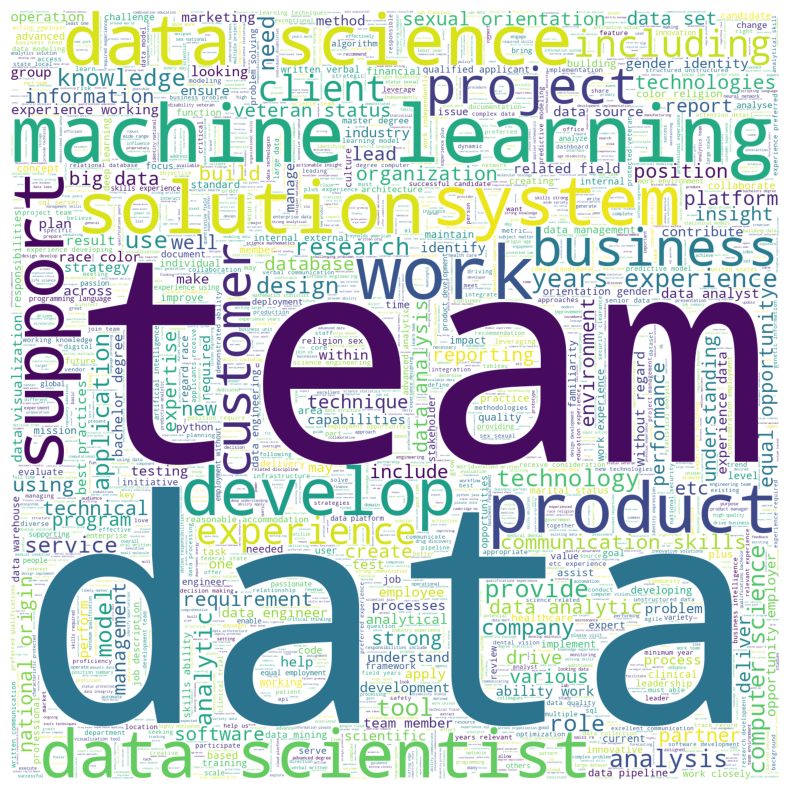

In [54]:
words = " ".join(df['Job Description'])

def preprocess(text):
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

word_filtered = preprocess(words)
text = " ".join(word_filtered)

wc = WordCloud(background_color='white',random_state=1,stopwords=STOPWORDS,max_words=2000,width=1500,height=1500)
wc.generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()